In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [2]:
# dataset best case a2cloud score 
df_bestcase_train = pd.read_csv("standalone_memory_a2cloudscore_best.csv")
# scala verification dataset  
df_scala_best = pd.read_csv("standalone_memory_a2cloudscore_scala_runtime_verfi_best.csv")

df_bestcase_train

,a2cloud_score,Cost(per hour USD),Instance
0,4.633440,0.0928,t2.large
1,6.318830,0.0832,B2ms
2,9.038884,0.0950,N1s2
3,9.821039,0.0150,Lin.G
4,4.977152,0.1000,c4.large
...,...,...,...
395,5.975094,0.0230,t2.small
396,1.000000,0.0752,t3a.large
397,1.181247,0.0376,t3a.medium
398,2.507509,0.0188,t3a.small


In [3]:
from sklearn.utils import shuffle
df_bestcase_train = shuffle(df_bestcase_train)

df_bestcase_train=df_bestcase_train.append(df_scala_best)


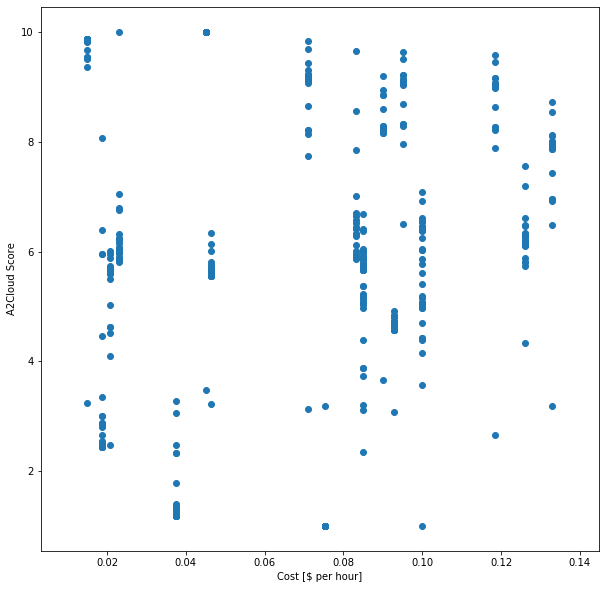

In [4]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df_bestcase_train.iloc[:,1:2],df_bestcase_train.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')
plt.show()

In [5]:
X=df_bestcase_train.iloc[:,0:2]
model = KMeans(n_clusters = 4)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([1, 2, 3, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 3, 1, 2, 1, 2, 2, 3,
       2, 3, 2, 3, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 3, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 0, 2, 0, 2, 3, 2, 1, 3, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1,
       3, 3, 3, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 2, 2, 2, 2, 0, 0, 3, 1, 3,
       3, 1, 2, 1, 1, 3, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 0, 0,
       2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 0, 2, 3, 3, 1, 0, 0, 0, 1, 3, 1, 2,
       1, 2, 2, 2, 1, 1, 3, 3, 2, 1, 1, 1, 2, 2, 3, 2, 0, 1, 1, 3, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0,
       0, 2, 3, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 2, 3, 2, 3, 1, 0, 1, 3, 2, 2, 2, 3, 3, 3,
       1, 2, 2, 0, 2, 2, 0, 2, 1, 3, 1, 2, 3, 0, 1, 1, 1, 1, 3, 2, 1, 3,
       2, 1, 0, 2, 3, 3, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 3,
       2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 2, 1, 2, 1, 0,

In [6]:
df_bestcase_train['cluster']=labels

Text(0, 0.5, 'A2Cloud Score')

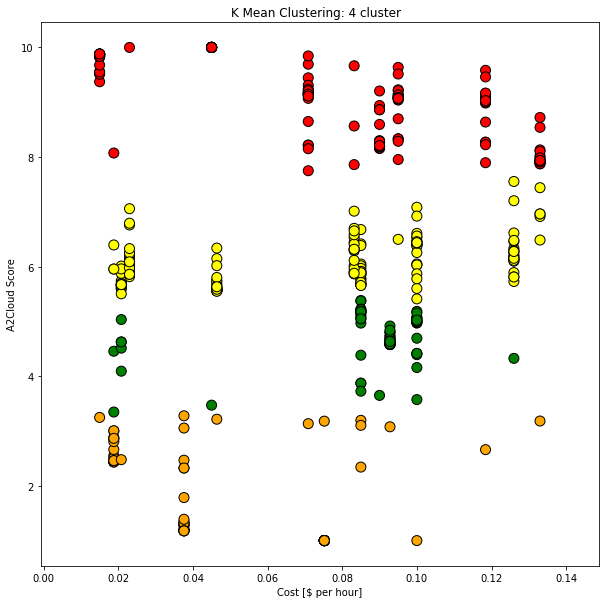

In [19]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow','orange'])
plt.scatter(df_bestcase_train.iloc[:,1:2], df_bestcase_train.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 4 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')

In [8]:
xtrain=df_bestcase_train[['a2cloud_score','Cost(per hour USD)']]
xtrain=xtrain[0:300]
ytrain=df_bestcase_train['cluster'].values.tolist()
ytrain=ytrain[0:300]

In [9]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
xtest=df_bestcase_train[['a2cloud_score','Cost(per hour USD)']]
xtest=xtest[300:400]
b=df_bestcase_train['cluster'].values.tolist()

y_actual=b[300:400]

In [11]:
y_pred = classifier.predict(xtest)


In [12]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 99.0 %


In [13]:
print(confusion_matrix(y_pred, y_actual))


[[17  0  0  0]
 [ 0 36  1  0]
 [ 0  0 36  0]
 [ 0  0  0 10]]


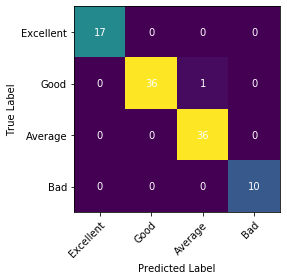

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

a_label = ["Excellent", "Good","Average", "Bad"]
p_label = ["Excellent","Good", "Average", "Bad"]

#harvest = np.array([[4,0,0],[0,0,0], [0,7,1]])
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

# SCALA VERIFICATION

In [15]:
x_scala_best=df_scala_best[['a2cloud_score','Cost(per hour USD)']]


In [16]:
y_pred = classifier.predict(x_scala_best)


In [17]:
y_actual=b[400:420]


In [18]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 85.0 %
